# Lab 6 - Gradient descent 
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:dimitri@berkeley.edu))
- **Date:** 4 March 2020
- **Course:** INFO 251: Applied machine learning

### Topics:
1. Gradient Descent
2. Mini-Batch and stochastic variants


### References: 
 * [Stochastic GD](https://scikit-learn.org/stable/modules/sgd.html)
 

In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import IPython
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from scipy import stats
%matplotlib inline

### Simple 2D example of GD

$J=J_1(x,y)=\frac{x^2}{8}+y^2$  where I use $x,y$ for $x$ and $y$ coordinate or $z_1,z_2$ as in slides

perform gradeint descent on this function.
Gradients are :
$\frac{\partial J_1(x,y)}{\partial x}=2x/8$ and  $\frac{\partial J_1(x,y)}{\partial y}=2y$

Also provided $J_2(x,y) = (1.5-x-xy)^2+(2.25-x-xy^2)^2+(2.626-x-xy^3)^3$

In [8]:
def func_f(x, y):
    # Simple function with 2 inputs
    # Calculate values of Z from the created grid
    # feel free to check other functions too
    f = x**2/8+y**2 # call this f1
    #f = (1.5-x+x*y)**2+(2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2 # call this f2
    return f

def gradient_descent(px, py, learning_rate, epoch):
    x_gd = []
    y_gd = []
    f_gd = []
    x_gd.append(px) # 1st coordinate
    y_gd.append(py)  # 2nd coordinate
    f_gd.append(func_f(px, py)) # value of function
    # begin the loops to update x, y and z
    for i in range(epoch):
        #der_x = 2*(1.5-px+px*py)*(py-1)+2*(2.25-px+px*py**2)*(py**2-1)+2*(2.625-px+px*py**3)*(py**3-1) # for f2
        #der_y = 2*(1.5-px+px*py)*px+2*(2.25-px+px*py**2)*(2*py*px)+2*(2.625-px+px*py**3)*(3*py**2*px) # for f2
        der_x = 2*px/8
        der_y = 2*py
        px = px - learning_rate * der_x
        x_gd.append(px)
        py = py - learning_rate * der_y
        y_gd.append(py)
        f_gd.append(func_f(px, py))
    return x_gd, y_gd, f_gd

In [9]:
x0 = 2.1
y0 = 2
learning_rate = 0.92
epoch = 1500
''' Plot our function '''
a = np.arange(-4, 4, 0.05)
b = np.arange(-4, 4, 0.05)

x, y = np.meshgrid(a, b)
f = func_f(x, y)



### Plot the function

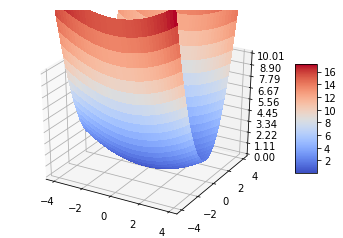

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

 # Customize the z axis.

ax.set_zlim(-0.0, 10.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Plot the convergence of GD

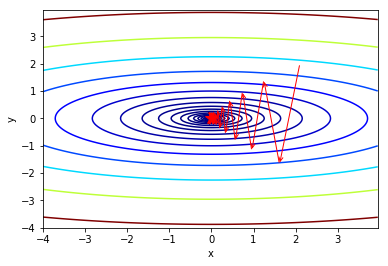

In [11]:

fig1, ax1 = plt.subplots()
ax1.contour(x, y, f, levels=np.logspace(-4, 4, 35), cmap='jet')
#Plot target (the minimum of the function)
min_point = np.array([3.0, 0.5])
min_point_ = min_point[:, np.newaxis]
ax1.plot(0.0, 0.0, 'r*', markersize=12) #This is the min for f1
#ax1.plot(3.0, 0.5, 'r*', markersize=12) #This is the min for f2
ax1.set_xlabel(r'x')
ax1.set_ylabel(r'y')
x_gd, y_gd, z_gd = gradient_descent(x0, y0, learning_rate, epoch)
for i in range(1, epoch+1):
   ax1.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                  arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                  va='center', ha='center')

''' Animation '''
# Create animation
line, = ax1.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], 'bo')
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

plt.show()

### Regression on Boston data

For this lab, let's keep using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).

In [14]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
# regress Y (median value) on nitric oxides concentration 
X_NOX = X[:,4] #nitric oxides concentration (parts per 10 million)
Y = y # median house value
n = len(y)
Xr = np.column_stack((np.ones(n), X_NOX))
# Get OLS closed form solution
beta_tilde = np.linalg.inv(np.matmul(Xr.T,Xr))@Xr.T@y
print("intercept and slope from closed form solution {}".format(beta_tilde))
# Check with statsmodels
slope, intercept, r_value, p_value, std_err = stats.linregress(X_NOX,Y)
print("intercept and slope from scipy stats {}, {}".format(intercept, slope))


intercept and slope from closed form solution [ 41.34587447 -33.91605501]
intercept and slope from scipy stats 41.345874467973246, -33.916055008661104


### Reminder:
OLS objective is $J(\alpha,\beta)=\frac{1}{2N}\sum_{i=1}^{N}(y_i-\alpha-\beta x_i)^2$ and its gradients are: 
\begin{align*}
&\frac{\partial J(\alpha,\beta)}{\partial \alpha}=\frac{1}{N}\sum_{i=1}^{N}(y_i-\alpha-\beta x_i)\\
&\frac{\partial J(\alpha,\beta)}{\partial \beta}=\frac{1}{N}\sum_{i=1}^{N}(y_i-\alpha-\beta x_i)x_i
\end{align*}

The GD update steps are:
\begin{align*}
&\alpha\leftarrow \alpha-R \frac{\partial J(\alpha,\beta)}{\partial \alpha}\\
&\beta\leftarrow \beta -R\frac{\partial J(\alpha,\beta)}{\partial \beta}
\end{align*}

In [32]:
# learning rate R, run GD for at most MaxIterations
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):  

        
   

### Now with GD

In [33]:
inter, slope, iters = bivariate_ols(X_NOX, Y, 0.6, 1000000)
print('intercept is {} and slope is {}'.format(inter, slope))
print('In {} iterations'.format(iters))

intercept is 41.34334869174296 and slope is -33.91155582100704
In 1262 iterations
